# Genres that yield highest net profit

To understand what kind of films are worth a production investment, we'll look at data sets containing gross revenue, production costs, genres and general film distribution data such as title and the year of release.

note: to create the movie.db locally, run the notebook SQLiteDatabase.ipynb

In [1]:
#necessary imports

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#changing the display settings to only format floats

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

## Overall, what are the top 5 films with the highest net revenue?

In [107]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  t.year, SUM(t.worldwide_gross-t.production_budget) as movieBudget_netRevenue_$,
  t.movie as movieBudget_title, b.title as boxOfficeMojo_title, 
  t.worldwide_gross as movieBudget_Worldwide_$,
  t.production_budget as movieBudget_Production_$, 
  t.domestic_gross as movieBudget_Domestic_$,
  b.domestic_gross as boxOfficeMojo_Domestic_$,
  b.foreign_gross as boxOfficeMojo_foreign_$
FROM tn_movie_budgets t 
LEFT JOIN bom_movie_gross b
ON t.movie = b.title
GROUP BY t.movie
ORDER BY movieBudget_netRevenue_$ DESC
LIMIT 5
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft

,year,movieBudget_netRevenue_$,movieBudget_title,boxOfficeMojo_title,movieBudget_Worldwide_$,movieBudget_Production_$,movieBudget_Domestic_$,boxOfficeMojo_Domestic_$,boxOfficeMojo_foreign_$
0,2009,2351345279,Avatar,None,2776345279,425000000,760507625,nan,None
1,1997,2008208395,Titanic,None,2208208395,200000000,659363944,nan,None
2,2018,1748134200,Avengers: Infinity War,Avengers: Infinity War,2048134200,300000000,678815482,678800000.00,"1,369.5"
3,2015,1747311220,Star Wars Ep. VII: The Force Awakens,None,2053311220,306000000,936662225,nan,None
4,2017,1687630838,Beauty and the Beast,None,1259199706,160000000,504014165,nan,None


***Findings***: We found that values were rounded and titles were missing in the Box Office Mojo file and decided to use the Budget dataset as true values. We also found through comparison of both datasets that the worldwide revenue included both domestic and foreign gross. So, this is the total gross revenue. 

The top 5 net revenue films are:
1. $2.4B Avatar

2. $2.0B Titanic

3. $1.748B Avengers: Infinity War

4. $1.747B Star Wars Ep. VII: The Force Awakens

5. $1.69B Beauty and the Beast


### If available, what are the genres of those top 5 films? 

In [111]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT i.tconst as IMDB_id, t.year, i.primary_title as Movie, i.genre_action, 
i.genre_adult, i.genre_adventure, i.genre_animation, i.genre_biography, 
i.genre_comedy, i.genre_crime, i.genre_documentary, i.genre_drama, i.genre_family, 
i.genre_fantasy, i.genre_gameshow, i.genre_history, i.genre_horror, i.genre_music, 
i.genre_musical, i.genre_mystery, i.genre_news, i.genre_realitytv, i.genre_romance, 
i.genre_scifi, i.genre_short, i.genre_sport, i.genre_talkshow, i.genre_thriller, 
i.genre_war, i.genre_western
FROM imdb_title_basics i
LEFT JOIN tn_movie_budgets t 
ON i.primary_title = t.movie
WHERE (i.primary_title == 'Beauty and the Beast') & (i.tconst == 'tt2771200') & (t.year like '%17%') OR (i.primary_title == 'Black Panther') OR 
(i.primary_title == 'Jurassic World') OR (i.primary_title like '%Infinity War%') & 
(i.primary_title like '%Avengers%') OR (i.primary_title like '%Jurassic World%') & (i.primary_title like '%Fallen Kingdom%')
ORDER BY i.primary_title
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft

,IMDB_id,year,Movie,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_gameshow,genre_history,genre_horror,genre_music,genre_musical,genre_mystery,genre_news,genre_realitytv,genre_romance,genre_scifi,genre_short,genre_sport,genre_talkshow,genre_thriller,genre_war,genre_western
0,tt4154756,2018,Avengers: Infinity War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,tt2771200,2017,Beauty and the Beast,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,tt1825683,2018,Black Panther,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,tt0369610,2015,Jurassic World,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,tt4881806,2018,Jurassic World: Fallen Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


***Findings***: Looking at the IMDB dataset, we found the titles of the top 5 net revenue films and noted the identified genres for each film. The genres include action, adventure, family, fantasy, music, musical and sci-fi. There is a definite trend showing that 4/5 of these movies are in the Action, Adventure and Sci-Fi genres. 

Additional note: the film "Beauty and Beast" returned multiple listings, but with a quick online search, we found the appropriate IMDB film ID that matched the 2017 release. We also joined the Budget dataset as a double check for the appropriate year.

## Top 5 grossing films by year

### What are the titles of the films?

In [109]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  t.year, t.worldwide_gross grossRevenue_$,
  t.movie as movieTitle
FROM tn_movie_budgets t 
GROUP BY t.movie
ORDER BY grossRevenue_$ DESC
LIMIT 5
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft

,year,grossRevenue_$,movieTitle
0,2009,2776345279,Avatar
1,1997,2208208395,Titanic
2,2015,2053311220,Star Wars Ep. VII: The Force Awakens
3,2018,2048134200,Avengers: Infinity War
4,2015,1648854864,Jurassic World


***Findings***: The movie budget dataset shows us that the top 5 grossing films were released between the years 1997 and 2018. These films vary from the list of top 5 net revenue films indicating that production cost brought down the net revenue for 'Jurassic World'.

### So, what was the production cost for these top grossing films?

In [110]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  DISTINCT year, production_budget, movie
FROM tn_movie_budgets 
ORDER BY worldwide_gross DESC
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft.head()

,year,production_budget,movie
0,2009,425000000,Avatar
1,1997,200000000,Titanic
2,2015,306000000,Star Wars Ep. VII: The Force Awakens
3,2018,300000000,Avengers: Infinity War
4,2015,215000000,Jurassic World


***Findings***: The data show that the lowest production budget spend was on 'Titanic' and ranged to $425 million for the most expensive budget on 'Avatar'.

note: 'Jurassic World' had a lower production budget similar to 'Titanic' but did not bring in enough gross revenue to bring the film into the top 5 net revenue films. It trailed 'Titanic' by $5.6M in overall gross revenue. 

We also noticed that 'Avatar' had the highest spend in production budget but yeilded the highest overall gross and net revenues.

### What was the runtime?

In [114]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT i.tconst as IMDB_id, t.year, i.primary_title as Movie, i.runtime_minutes
FROM imdb_title_basics i
LEFT JOIN tn_movie_budgets t 
ON i.primary_title = t.movie
WHERE (i.primary_title == 'Beauty and the Beast') & (i.tconst == 'tt2771200') & (t.year like '%17%') OR (i.primary_title == 'Black Panther') OR 
(i.primary_title == 'Jurassic World') OR (i.primary_title like '%Infinity War%') & 
(i.primary_title like '%Avengers%') OR (i.primary_title like '%Jurassic World%') & (i.primary_title like '%Fallen Kingdom%')
ORDER BY i.runtime_minutes
;
""")


dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft

,IMDB_id,year,Movie,runtime_minutes
0,tt0369610,2015,Jurassic World,124.00
1,tt4881806,2018,Jurassic World: Fallen Kingdom,128.00
2,tt2771200,2017,Beauty and the Beast,129.00
3,tt1825683,2018,Black Panther,134.00
4,tt4154756,2018,Avengers: Infinity War,149.00


***Findings***: From the IMDB dataset, we can see that the movies ranged in runtime from 124 — 149 minutes.

## Most recently, what has been the average production cost by year? 

In [197]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  year, AVG(production_budget) as average_Budget_$, COUNT(movie) as number_of_Movies
FROM tn_movie_budgets 
GROUP BY year
ORDER BY year DESC
LIMIT 10
;
""")

#cur.execute("""
#SELECT year, MIN(production_budget) + (MAX(production_budget) - MIN(production_budget))/2 as Median
#FROM (
#   SELECT production_budget, year
#      FROM tn_movie_budgets
#      WHERE year like '%2020%'
#      ORDER BY year
#      LIMIT 2 - ((SELECT COUNT(*) FROM tn_movie_budgets) % 2) -- odd 1, even 2
#      OFFSET (SELECT (COUNT(*) - 1) / 2 FROM tn_movie_budgets)
#);
#""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
print(dft.info())

dft.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              10 non-null     object 
 1   average_Budget_$  10 non-null     float64
 2   number_of_Movies  10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes
None


,year,average_Budget_$,number_of_Movies
0,2020,94000000.00,3
1,2019,52738955.22,67
2,2018,48138860.14,143
3,2017,50030732.14,168
4,2016,40973698.63,219
5,2015,26160294.08,338
6,2014,30405519.11,255
7,2013,37392382.35,238
8,2012,36115468.82,235
9,2011,35247843.70,254


***Findings***: The average production costs range from $ 26 - 94 Million in the past 10 years

## Which 5 genres had the highest box office revenue?

In the Rotten Tomatoes dataset, Is there a common genre associated with highest box office revenue?

In [117]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office, genre_action, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC
LIMIT 5;""")

pd.set_option('display.max_columns', None)
dfgBox = pd.DataFrame(cur.fetchall())
dfgBox.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dfgBox

,rating,box_office,genre_action,genre_adventure,genre_animation,genre_classics,genre_comedy,genre_documentary,genre_drama,genre_horror,genre_international,genre_kids,genre_muscial,genre_mystery,genre_scifi,genre_spirituality,genre_sports,genre_romance,genre_television,genre_western
0,3/4,368000000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2.5/5,303001229.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,299300000.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.5/4,279167575.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,B-,261835892.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


***Findings***: Films with the highest box office revenue are primarily distributed within the action, adventure, comedy, kids, mystery, sci-fi and drama genres

## Data Visualization

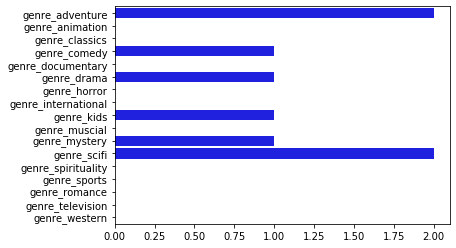

In [136]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office, genre_action, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC
LIMIT 5;""")

dfgBox = pd.DataFrame(cur.fetchall())
dfgBox.columns = (x[0] for x in cur.description)
#dfgBoxList = dfgBox.values.tolist()
cols = list(dfgBox.columns)
genre_cols = cols[3:]
genre_count = {}
for col in genre_cols:
    count = np.sum(dfgBox[col] != '0').sum() 
    genre_count[col] = count
    
genre_count   

keys = list(genre_count.keys())
values = list(genre_count.values())

sns.barplot(y = keys, x = values, color = 'blue')

***Findings***: write summary here